## Diving into continuous futures data with Nasdaq Data Link

### 기본 환경 설정
```bash
conda update -n base conda -y
conda create -n qt python=3.10 -y
conda activate qt
```
### 주요 패키지 설치
```bash
# Jupyter Notebook과 시각화 도구
pip install notebook matplotlib nasdaq-data-link pandas_datareader ipykernel 
pip install python-dotenv
pip install "openbb[all]"
```
이 패키지들은 다음 기능들을 제공합니다:
- 금융 데이터 수집 및 분석
- 데이터 시각화
- 기술적 분석
- 백테스팅
- 실시간 트레이딩
- .env활용하여 비밀번호 등 관리
- 파이썬 커널 등록
```
python -m ipykernel install --user --name=qt
```



## Exploring S&P 500 ratios data with Nasdaq Data Link
As of August 2024 (after the publication of <em>Python for Algorithmic Trading Cookbook</em>), Nasdaq as discontinued access to the <code>MULTPL</code> database. According to Nasdaq, there is no replacement for financial multiples data. Since the code in this notebook uses the <code>MULTPL</code> database, it will not work. I'm as disappointed as you are since there was no forewarning from Nasdaq.</h2>

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

In [6]:
import nasdaqdatalink
from IPython.display import display

In [7]:
nasdaqdatalink.ApiConfig.api_key = "YOUR_API_KEY"

Fetches data for the specified NASDAQ dataset and stores it in 'data'

In [8]:
data = nasdaqdatalink.get("CHRIS/CME_ES1")

DataLinkError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

In [ ]:
display(data)

Fetches the data in numpy array format for the specified dataset

In [9]:
data = nasdaqdatalink.get("CHRIS/CME_ES1", returns="numpy")
'''
NumPy 배열 형식으로 데이터를 반환합니다
수치 계산에 최적화된 형태로 데이터를 제공합니다
메모리 사용이 더 효율적일 수 있습니다
행렬 연산이나 수학적 계산을 할 때 더 빠른 성능을 제공할 수 있습니다
선택은 데이터를 어떻게 활용할 것인지에 따라 달라집니다. 데이터 분석과 전처리가 주목적이라면 DataFrame을, 
수치 계산이 주목적이라면 NumPy 배열이 더 적합할 수 있습니다.
'''

DataLinkError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

In [ ]:
display(data)

Fetches data for the specified dataset within the given date range and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get(
    "CHRIS/CME_ES1", start_date="2001-12-31", end_date="2005-12-31"
)

In [10]:
display(data)

NameError: name 'data' is not defined

Fetches data for a specific column in the dataset within the given date range and stores it in 'data'

In [ ]:
'''
NASDAQ Data Link(구 Quandl) API를 사용하여
S&P 500 E-mini 선물 데이터를 가져오는 Python 코드입니다.
'''
data = nasdaqdatalink.get(
    "CHRIS/CME_ES1.8", start_date="2001-12-31", end_date="2005-12-31"
)

In [12]:
display(data)

NameError: name 'data' is not defined

Fetches data for the specified dataset with monthly aggregation and stores it in 'data'

In [13]:
data = nasdaqdatalink.get("CHRIS/CME_ES1", collapse="monthly")

DataLinkError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

In [ ]:
display(data)

Defines a list of contract codes to fetch data for multiple contracts

In [14]:
'''
ES1.6부터 ES4.6까지는 각각 다른 만기의 선물 계약을 의미합니다
ES1: 최근월물
ES2: 2번째 근월물
ES3: 3번째 근월물
ES4: 4번째 근월물
'''
contracts = [
    "CHRIS/CME_ES1.6",
    "CHRIS/CME_ES2.6",
    "CHRIS/CME_ES3.6",
    "CHRIS/CME_ES4.6",
]

Fetches data for the specified contracts within the given date range and stores it in 'data'

In [15]:
data = nasdaqdatalink.get(contracts, start_date="2015-01-01", 
                          end_date="2015-12-31")
'''
복수의 데이터를 기간 지정하여 가져오기
'''

DataLinkError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

Plots the data for the first contract on the first available date

In [ ]:
data.iloc[0].plot(title=f"ES on {data.index[0]}")

In [4]:
import nasdaqdatalink
from IPython.display import display

In [5]:
nasdaqdatalink.ApiConfig.api_key = "YOUR_API_KEY"

Fetches S&P 500 dividend yield data and stores it in 'data'

In [6]:
data = nasdaqdatalink.get("MULTPL/SP500_DIV_YIELD_MONTH")
'''

MULTPL/SP500_DIV_YIELD_MONTH는 S&P 500 지수의 
월별 배당 수익률을 나타내는 데이터셋 코드입니다.
MULTPL은 데이터 제공자를 나타냅니다.
SP500_DIV_YIELD_MONTH는 S&P 500의 월별 배당 수익률 데이터를 의미합니다.

이 코드는 기본적으로 Pandas DataFrame 형식으로 데이터를 반환합니다.
데이터는 날짜별로 정렬되며, 각 행은 특정 월의 S&P 500 배당 수익률을 나타냅니다.

이 데이터는 S&P 500 지수의 전반적인 배당 동향을 분석하는 데 유용합니다.
투자자들은 이 정보를 통해 시장의 전반적인 수익률 동향을 파악할 수 있습니다.

또한 역사적 배당 수익률 패턴을 연구하거나 
다른 경제 지표와의 상관관계를 분석하는 데 사용될 수 있습니다.
이 코드를 실행하면 S&P 500의 월별 배당 수익률 데이터를 쉽게 얻을 수 있어, 
금융 분석이나 투자 결정에 유용한 정보를 제공합니다.
'''


DataLinkError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

In [ ]:
display(data)

Plots the S&P 500 dividend yield data with the specified title

In [ ]:
data.plot(title="S&P 500 dividend yield (12 month dividend per share)/price")

## Working with stock market data with the OpenBB Platform

In [77]:
from IPython.display import display
from openbb import obb

In [78]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "SPY" using the "yfinance" provider and displays the first 10 rows

In [80]:
'''
obb.equity.price.historical: 주식의 과거 가격 데이터를 가져오는 함수입니다
'''
data = obb.equity.price.historical("SPY", provider="yfinance")
'''
"SPY": S&P 500 ETF의 티커 심볼입니다
provider="yfinance": 데이터를 가져올 소스로 Yahoo Finance API를 사용한다는 의미입니다1
반환 데이터

이 코드를 실행하면 다음과 같은 데이터를 포함하는 DataFrame이 반환됩니다:
Open (시가)
High (고가)
Low (저가)
Close (종가)
Volume (거래량)
Dividends (배당금)
Stock Splits (주식 분할)13
이 데이터는 투자 분석, 백테스팅, 또는 시장 동향 연구에 활용될 수 있습니다.
'''

'\nobb.equity.price.historical: 주식의 과거 가격 데이터를 가져오는 함수입니다\n"SPY": S&P 500 ETF의 티커 심볼입니다\nprovider="yfinance": 데이터를 가져올 소스로 Yahoo Finance API를 사용한다는 의미입니다1\n반환 데이터\n\n이 코드를 실행하면 다음과 같은 데이터를 포함하는 DataFrame이 반환됩니다:\nOpen (시가)\nHigh (고가)\nLow (저가)\nClose (종가)\nVolume (거래량)\nDividends (배당금)\nStock Splits (주식 분할)13\n이 데이터는 투자 분석, 백테스팅, 또는 시장 동향 연구에 활용될 수 있습니다.\n'

In [10]:
display(data.head(10))

,open,high,low,close,volume,dividend
date,,,,,,
2023-12-11,459.690002,462.170013,459.470001,461.989990,65002200,0.000
2023-12-12,461.630005,464.200012,460.600006,464.100006,68327600,0.000
2023-12-13,464.489990,470.760010,464.119995,470.500000,93278000,0.000
2023-12-14,472.500000,473.730011,469.250000,472.010010,119026000,0.000
2023-12-15,469.489990,470.700012,467.429993,469.329987,141319300,1.906
2023-12-18,470.980011,472.980011,469.890015,471.970001,70375300,0.000
2023-12-19,472.529999,474.920013,472.450012,474.839996,55761800,0.000
2023-12-20,473.959991,475.899994,467.820007,468.260010,102921000,0.000
2023-12-21,471.329987,472.980011,468.839996,472.700012,86667500,0.000


Fetches fundamental metrics for the equities "AAPL" and "MSFT" using the "yfinance" provider and transposes the dataframe

In [11]:
'''
obb.equity.fundamental는 기본적 지표를 보여줍니다.
'''
data = obb.equity.fundamental.metrics("AAPL,MSFT", provider="yfinance")

In [12]:
display(data.T)

,0,1
symbol,AAPL,MSFT
market_cap,3729823629312.0,3316105084928.0
pe_ratio,40.65074,36.83072
forward_pe,29.780296,29.673222
peg_ratio_ttm,2.5091,2.3496
enterprise_to_ebitda,28.098,24.419
earnings_growth,-0.341,0.104
earnings_growth_quarterly,-0.358,0.107
revenue_per_share,25.485,34.202
revenue_growth,0.061,0.16


Fetches valuation metrics for industries using the "finviz" provider and displays the data

In [81]:
'''
이 코드는 Finviz를 통해
산업별 기업들의 밸류에이션 지표를 비교 분석하는 코드입니다.
'''

data = obb.equity.compare.groups(
    group="industry", metric="valuation", provider="finviz"
)

- group="industry": 산업군별로 데이터를 그룹화합니다
- metric="valuation": 밸류에이션 관련 지표들을 가져옵니다
- provider="finviz": Finviz를 데이터 제공자로 사용합니다

In [82]:
display(data)

,name,market_cap,performance_1d,forward_pe,eps_growth_past_5y,eps_growth_next_5y,volume,price_to_sales,price_to_book,price_to_cash,price_to_free_cash_flow,sales_growth_past_5_years,pe,peg
0,Pharmaceutical Retailers,8240000000,0.0351,6.54,-0.0599,-0.0002,23670000,0.06,0.76,2.55,432.95,0.0547,NaN,NaN
1,Marine Shipping,33290000000,-0.0067,7.06,0.2214,0.1997,24430000,1.02,0.91,4.60,5.90,0.2283,4.81,0.24
2,Insurance - Reinsurance,48810000000,-0.0150,7.26,0.5437,0.0323,2470000,0.87,1.17,NaN,2.56,0.2245,6.33,1.96
3,REIT - Mortgage,60690000000,0.0043,7.68,-0.2239,0.0271,48000000,2.02,0.89,4.07,14.12,0.2875,15.11,5.58
4,Coking Coal,10400000000,0.0084,8.29,0.0618,0.0660,2890000,1.01,1.69,6.82,11.18,0.1575,10.18,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,REIT - Healthcare Facilities,165360000000,-0.0085,64.29,-0.1274,0.1292,35660000,6.96,2.11,24.22,28.59,0.1207,97.52,7.55
141,REIT - Office,100020000000,0.0233,75.51,-0.2092,0.0114,52810000,5.09,1.49,11.20,18.05,0.0581,80.61,70.52
142,Infrastructure Operations,34880000000,-0.0054,162.62,NaN,0.1267,1380000,3.33,7.42,8.41,32.63,0.0789,37.89,2.99
143,Shell Companies,29340000000,0.0028,164.04,NaN,NaN,8920000,15.50,2.44,37.50,184.00,0.7636,69.22,NaN


> PEG(Price/Earnings-to-Growth) 비율은 기업의 주가수익비율(P/E)을 예상 수익 성장률로 나눈 투자 지표입니다.

- PEG 해석
    PEG가 낮을수록 더 좋은 투자 기회를 의미합니다
- PEG 1.0을 기준으로 해석합니다:
    - PEG < 1.0: 주식이 저평가되어 있음
    - PEG = 1.0: 적정 가치
    - PEG > 1.0: 주식이 고평가되어 있음
- 주의사항
    - 성장주 분석에 특히 유용합니다
    - 배당 수익률이 낮은 기업에 더 효과적입니다
    - 예상 성장률에 기반하므로 실제 성장이 예상과 다를 수 있다는 점을 고려해야 합니다

Fetches performance metrics for industries using the "finviz" provider and displays the data

In [85]:
'''
이 코드는 Finviz를 통해 산업별 주가 성과(performance) 데이터를 비교 분석하는 코드입니다.
'''
data = obb.equity.compare.groups(
    group="industry", metric="performance", provider="finviz"
)

- metric="performance": 주가 성과 관련 지표를 가져옴
- 기간별 수익률 : 당일 수익률 (Today),주간 수익률 (Week),월간 수익률 (Month),분기 수익률 (Quarter),연간 수익률 (Year),연초대비 수익률 (YTD)
-  다음과 같은 분석에 활용됩니다:
    - 산업별 모멘텀 비교
    - 섹터 로테이션 전략 수립
    - 상대 강도 분석
    - 업종별 트렌드 파악

In [86]:
display(data)

,name,performance_1d,performance_1w,performance_1m,performance_3m,performance_6m,performance_1y,performance_ytd,analyst_recommendation,volume,volume_average,volume_relative
0,Aluminum,-0.0092,-0.0660,-0.0589,0.3518,-0.0358,0.4956,0.1407,1.94,8340000,7860000,1.06
1,Healthcare Plans,0.0201,-0.0638,-0.0598,-0.1010,0.0052,-0.0490,-0.0426,1.60,39930000,40390000,0.99
2,Coking Coal,0.0084,-0.0630,-0.0785,0.2823,-0.0955,-0.0653,-0.1222,2.02,2890000,3130000,0.92
3,Thermal Coal,-0.0090,-0.0608,-0.0897,0.2084,0.0880,0.1420,0.1144,1.44,3140000,4210000,0.75
4,Trucking,0.0054,-0.0569,-0.0379,0.1521,0.1921,0.2199,0.1190,2.42,10470000,9210000,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Other Precious Metals & Mining,0.0486,0.0589,-0.0325,0.1703,0.0194,0.2826,0.1420,1.97,48870000,38280000,1.28
141,Electronic Gaming & Multimedia,0.0291,0.0650,0.1011,0.2475,0.2115,0.1582,0.1731,1.76,151610000,31970000,4.74
142,Internet Retail,0.0065,0.0668,0.0489,0.2306,0.1722,0.4409,0.3871,1.34,207960000,189300000,1.10
143,Paper & Paper Products,0.0166,0.0681,0.0589,0.1563,0.1613,0.1699,0.0620,1.54,3410000,3600000,0.95


Fetches overview metrics for industries using the "finviz" provider and displays the data

In [17]:
data = obb.equity.compare.groups(group="industry", metric="overview", provider="finviz")

In [18]:
display(data)

,name,market_cap,performance_1d,dividend_yield,pe,forward_pe,peg,float_short,volume,Stocks
0,Utilities - Independent Power Producers,81240000000,-0.0558,0.0111,19.34,17.50,1.70,0.0253,12370000,6
1,Uranium,38680000000,-0.0557,0.0013,126.45,56.94,1.95,0.0777,51830000,9
2,Telecom Services,1214150000000,-0.0389,0.0354,19.57,12.89,2.01,0.0138,195450000,54
3,Utilities - Renewable,230500000000,-0.0329,0.0113,45.70,30.78,1.86,0.0450,32070000,26
4,Gambling,118000000000,-0.0304,0.0021,129.59,33.05,3.03,0.0325,17680000,19
...,...,...,...,...,...,...,...,...,...,...
140,Other Industrial Metals & Mining,302600000000,0.0445,0.0524,11.15,10.19,NaN,0.0184,115980000,45
141,Solar,47250000000,0.0473,0.0016,24.85,12.86,1.04,0.1365,107630000,27
142,Copper,151730000000,0.0483,0.0181,29.31,19.55,1.39,0.0217,27270000,7
143,Other Precious Metals & Mining,20110000000,0.0486,0.0055,33.92,14.93,1.84,0.0217,48870000,18


**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Fetching historic futures data with the OpenBB Platform

In [87]:
import pandas as pd
from IPython.display import display
from openbb import obb

In [88]:
obb.user.preferences.output_type = "dataframe"

Fetches the futures curve data for the symbol "VX" and stores it in 'data'

In [89]:
data = obb.derivatives.futures.curve(symbol="VX")

- VX: CBOE VIX 선물을 의미합니다 (변동성 지수 선물)
- 여러 만기의 VIX 선물 가격을 한번에 조회할 수 있습니다
- 컨탱고(Contango)나 백워데이션(Backwardation) 상태를 파악할 수 있습니다
- 주요 정보
    - 각 만기별 VIX 선물 가격
    - 만기까지 남은 기간
    - 선물 곡선의 형태
    - 우상향: 컨탱고 상태
    - 우하향: 백워데이션 상태
- 이 데이터는 시장의 변동성에 대한 기대와 위험 관리 전략 수립에 활용됩니다.

In [92]:
display(data)

,expiration,price
expiration,,
2024-12-01,2024-12,14.75
2025-01-01,2025-01,16.30
2025-02-01,2025-02,17.10
2025-03-01,2025-03,17.50
2025-04-01,2025-04,17.80
2025-05-01,2025-05,18.15
2025-06-01,2025-06,18.40
2025-07-01,2025-07,18.70
2025-08-01,2025-08,18.80


Converts the 'expiration' column to datetime format and sets it as the index of 'data'

> 컨탱고(Contango)와 백워데이션(Backwardation)은 선물 시장의 가격 구조를 설명하는 중요한 개념입니다.
- 컨탱고(Contango)
    - 선물 가격이 현물(현재) 가격보다 높은 상태입니다. 선물 곡선이 우상향하는 형태를 보입니다
    - 발생 원인:
        - 보관 비용
        - 금융 비용
        - 보험 비용
        - 인플레이션 기대
- 백워데이션(Backwardation)
    - 선물 가격이 현물 가격보다 낮은 상태입니다
    - 선물 곡선이 우하향하는 형태를 보입니다3
    - 발생 원인:
        - 현물 수급 불균형
        - 단기적 공급 부족
        - 예기치 않은 시장 충격
    - 시장 영향
        - 수렴(Convergence)
            - 만기가 다가올수록 선물 가격은 현물 가격으로 수렴합니다
            - 그렇지 않으면 차익거래 기회가 발생합니다
- 투자 위험
    - 컨탱고 시장에서는 선물 매수자가 불리할 수 있습니다
    - 백워데이션 시장에서는 선물 매도자가 불리할 수 있습니다
    - 이러한 구조는 원유, 금과 같은 상품 선물 시장에서 자주 관찰되며, 투자자들의 미래 가격 기대를 반영합니다

In [93]:
data.index = pd.to_datetime(data.expiration)

Plots the data with the new datetime index

<Axes: xlabel='expiration'>

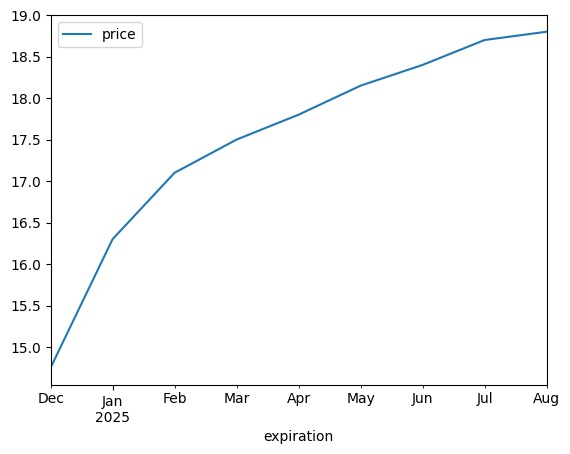

In [94]:
data.plot()

Fetches historical futures data for the symbol "CL" within the specified date range and stores it in 'data'

In [95]:
data = obb.derivatives.futures.historical(
    "CL", start_date="2020-01-01", end_date="2022-12-31"
)

In [96]:
display(data)

,open,high,low,close,volume
date,,,,,
2020-01-02,61.599998,61.599998,60.639999,61.180000,486873.0
2020-01-03,61.180000,64.089996,61.130001,63.049999,885861.0
2020-01-06,63.709999,64.720001,62.639999,63.270000,724236.0
2020-01-07,62.910000,63.150002,62.110001,62.700001,582649.0
2020-01-08,62.840000,65.650002,59.150002,59.610001,1205710.0
...,...,...,...,...,...
2022-12-23,78.180000,80.330002,77.980003,79.559998,237711.0
2022-12-27,79.900002,81.180000,79.160004,79.529999,199601.0
2022-12-28,79.889999,79.919998,77.300003,78.959999,207717.0


Defines a list of expiration dates for future contracts

In [104]:
expirations = [
    "2025-12",
    "2026-12",
    "2027-12",
    "2028-12",
    "2029-12",
    "2030-12",
]

Initializes an empty list to store individual contract data

In [105]:
contracts = []

Iterates over each expiration date, fetching and renaming historical futures data for "CL", and appends it to 'contracts'

In [106]:
'''
원유 선물(CL)의 여러 만기별 역사적 가격 데이터를 수집하는 반복문입니다.
'''
for expiration in expirations:
    try:
        df = (
            obb.derivatives.futures.historical(
                symbol="CL",# WTI 원유 선물 계약
                expiration=expiration,# 2025년부터 2030년까지의 12월물 계약
                start_date="2023-01-01",
                end_date="2024-12-09",#각 만기별로 2023년 1월 1일부터 2024년 12월 9일까지의 가격 데이터를 수집
            )
        ).rename(columns={"close": expiration})
        contracts.append(df[expiration])
    except Exception as e:
        print(f"Error downloading {expiration}: {e}")

Combines the individual contract data into a single DataFrame, transposes it, and drops any rows with missing values

In [107]:
historical = pd.DataFrame(contracts).transpose().dropna()

In [110]:
display(historical)

,2025-12,2026-12,2027-12,2028-12,2029-12,2030-12
date,,,,,,
2023-01-03,67.209999,64.389999,61.990002,59.889999,58.009998,56.330002
2023-01-04,66.510002,64.180000,62.040001,59.980000,58.099998,56.419998
2023-01-05,66.629997,64.160004,61.980000,59.970001,58.099998,56.419998
2023-01-06,66.809998,64.309998,62.139999,60.130001,58.259998,56.580002
2023-01-09,67.769997,65.220001,62.959999,60.880001,58.980000,57.299999
...,...,...,...,...,...,...
2024-12-03,67.370003,65.410004,64.150002,63.270000,62.619999,62.189999
2024-12-04,66.190002,64.379997,63.160000,62.299999,61.610001,61.009998
2024-12-05,66.029999,64.239998,63.090000,62.290001,61.680000,61.200001


Plots the data for the most recent historical contract

<Axes: >

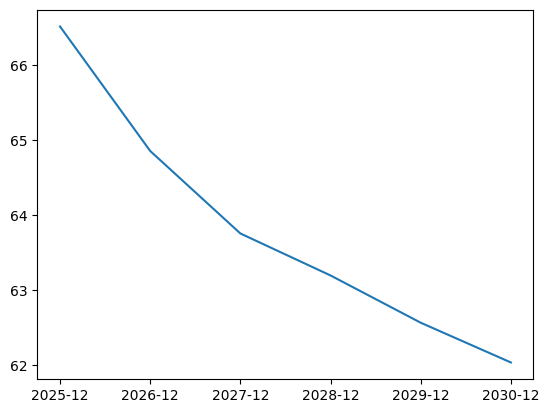

In [109]:
historical.iloc[-1].plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Navigating options market data with the OpenBB Platform

In [111]:
from IPython.display import display
from openbb import obb

In [112]:
obb.user.preferences.output_type = "dataframe"

Fetches options chains for the symbol "SPY" and stores it in 'chains'

In [113]:
chains = obb.derivatives.options.chains(symbol="SPY")

In [114]:
display(chains.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10188 entries, 0 to 10187
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   underlying_symbol   10188 non-null  object        
 1   underlying_price    10188 non-null  float64       
 2   contract_symbol     10188 non-null  object        
 3   expiration          10188 non-null  object        
 4   dte                 10188 non-null  int64         
 5   strike              10188 non-null  float64       
 6   option_type         10188 non-null  object        
 7   open_interest       10188 non-null  int64         
 8   volume              10188 non-null  int64         
 9   theoretical_price   10188 non-null  float64       
 10  last_trade_price    10188 non-null  float64       
 11  last_trade_time     8246 non-null   datetime64[ns]
 12  tick                10188 non-null  object        
 13  bid                 10188 non-null  float64   

None

Fetches historical price data for the specified option symbol using the "yfinance" provider and selects the "close" and "volume" columns

In [115]:
historic = obb.equity.price.historical(
    symbol="SPY241220C00550000", provider="yfinance"
)[["close", "volume"]]

In [116]:
display(historic)

,close,volume
date,,
2023-12-11,3.550000,53
2023-12-12,3.660000,19
2023-12-13,4.290000,109
2023-12-14,4.680000,129
2023-12-15,4.720000,105
...,...,...
2024-12-03,55.830002,9
2024-12-04,58.849998,920
2024-12-05,59.139999,93


Plots the historical "close" price data

<Axes: xlabel='date'>

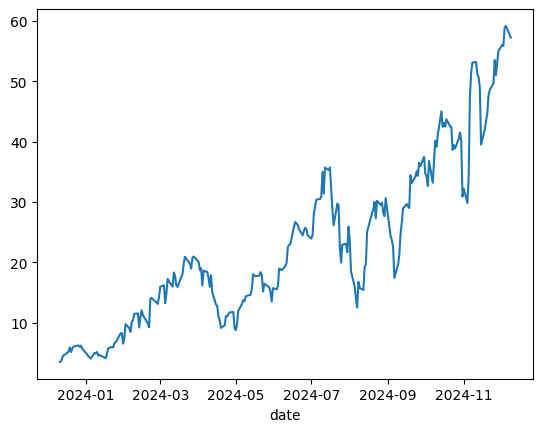

In [117]:
historic.close.plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Harnessing factor data using pandas_datareader

In [119]:
import warnings

In [120]:
import pandas_datareader as pdr
from IPython.display import display

In [121]:
warnings.filterwarnings("ignore")

Fetches the Fama-French research data factors and stores it in 'factors'

In [122]:
factors = pdr.get_data_famafrench(
    "F-F_Research_Data_Factors",
)

In [123]:
display(factors["DESCR"])

'F-F Research Data Factors\n-------------------------\n\nThis file was created by CMPT_ME_BEME_RETS using the 202410 CRSP database. The 1-month TBill rate data until 202405 are from Ibbotson Associates. Starting from 202406, the 1-month TBill rate is from ICE BofA US 1-Month Treasury Bill Index. Copyright 2024 Eugene F. Fama and Kenneth R. French\n\n  0 : (59 rows x 4 cols)\n  1 : Annual Factors: January-December (5 rows x 4 cols)'

Displays the first few rows of the first dataset in 'factors'

In [124]:
data = factors[0].head()

In [125]:
display(data)

,Mkt-RF,SMB,HML,RF
Date,,,,
2019-12,2.77,0.73,1.78,0.14
2020-01,-0.11,-3.13,-6.25,0.13
2020-02,-8.13,1.07,-3.80,0.12
2020-03,-13.39,-4.79,-13.88,0.13
2020-04,13.65,2.45,-1.34,0.00


Displays the first few rows of the second dataset in 'factors'

In [126]:
data = factors[1].head()

In [127]:
display(data)

,Mkt-RF,SMB,HML,RF
Date,,,,
2019,28.28,-6.13,-10.37,2.15
2020,23.66,12.72,-46.10,0.45
2021,23.57,-3.78,25.39,0.04
2022,-21.58,-7.04,25.97,1.43
2023,21.69,-3.28,-13.70,4.95


Fetches the Fama-French research data factors within the specified date range and stores it in 'factors'

In [128]:
factors = pdr.get_data_famafrench(
    "F-F_Research_Data_Factors", start="2000-01-01", end="2019-12-31"
)

In [129]:
display(factors)

{0:          Mkt-RF    SMB   HML    RF
 Date                              
 2000-01   -4.74   5.77 -1.88  0.41
 2000-02    2.45  21.36 -9.59  0.43
 2000-03    5.20 -17.20  8.13  0.47
 2000-04   -6.40  -6.68  7.26  0.46
 2000-05   -4.42  -6.05  4.75  0.50
 ...         ...    ...   ...   ...
 2019-08   -2.58  -2.39 -4.79  0.16
 2019-09    1.43  -0.97  6.77  0.18
 2019-10    2.06   0.29 -1.90  0.16
 2019-11    3.88   0.78 -1.99  0.12
 2019-12    2.77   0.73  1.78  0.14
 
 [240 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2000  -17.60  -4.60  44.98  5.89
 2001  -15.21  18.16  18.52  3.83
 2002  -22.76   4.39   8.09  1.65
 2003   30.75  26.49   4.67  1.02
 2004   10.72   4.45   7.61  1.20
 2005    3.09  -2.36   9.41  2.98
 2006   10.60   0.09  11.93  4.80
 2007    1.04  -7.44 -17.18  4.66
 2008  -38.34   2.40   1.05  1.60
 2009   28.26   9.18  -9.65  0.10
 2010   17.37  14.15  -5.15  0.12
 2011    0.44  -5.73  -8.41  0.04
 2012   16.27  -1.40  1